# Lab 10 - Classification

Name: Nick Satriano and Jake Luther
Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2023
Instructor: Brian King

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.graph_objects as go 
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

**1) Import the dataset and show the result of info():**

In [77]:
df_iris = sns.load_dataset('iris')

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**2) Convert the species variable to a categorical variable:**

In [78]:
df_iris['species'] = df_iris['species'].astype('category')

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


**3) Performing essential summarizing tasks on the data:**

In [79]:
print(df_iris.describe())
print("\nThe first 10 observations of the iris dataset:\n", df_iris.head(10))

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

The first 10 observations of the iris dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.

**4) Boxplot showing the distribution of each of the four independent variables:**

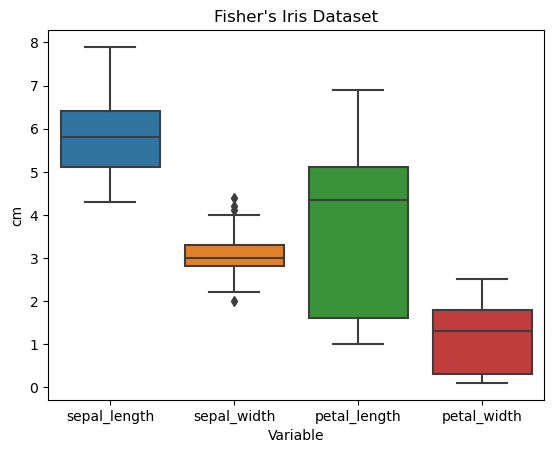

In [80]:
sns.boxplot(data=df_iris.iloc[:, :-1], orient="v")

plt.title("Fisher's Iris Dataset")
plt.xlabel("Variable")
plt.ylabel("cm")

plt.show()

**5) Violin plots:**

A violin plot shows the shape of the distribution of all selected variables.

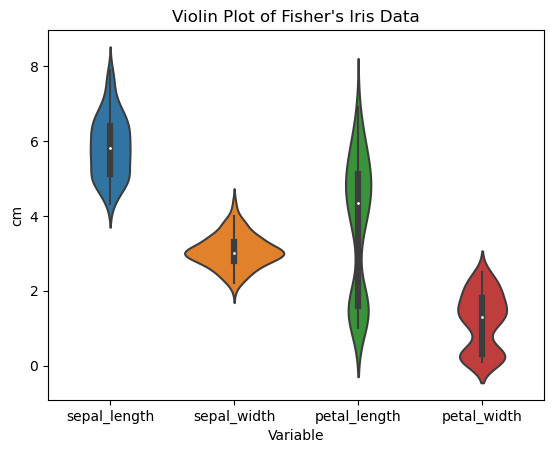

In [81]:
sns.violinplot(data=df_iris.iloc[:, :-1], orient="v")

plt.title("Violin Plot of Fisher's Iris Data")
plt.xlabel("Variable")
plt.ylabel("cm")

plt.show()

**6) Histogram of each variable on a single plot:**

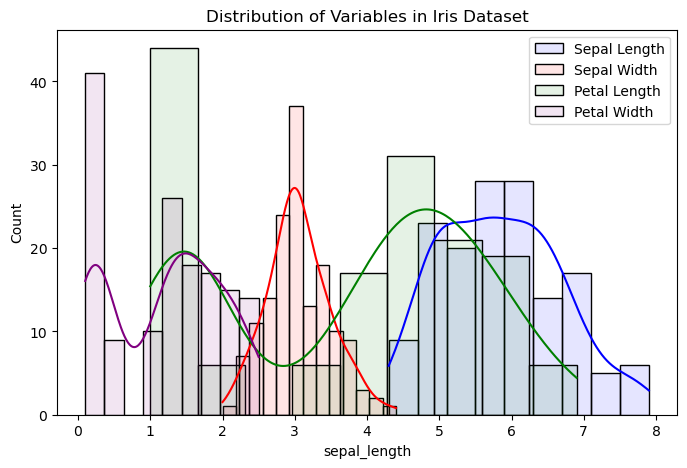

In [82]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=df_iris, x='sepal_length', kde=True, alpha=0.1, label='Sepal Length', color='blue')
sns.histplot(data=df_iris, x='sepal_width', kde=True, alpha=0.1, label='Sepal Width', color='red')
sns.histplot(data=df_iris, x='petal_length', kde=True, alpha=0.1, label='Petal Length', color='green')
sns.histplot(data=df_iris, x='petal_width', kde=True, alpha=0.1, label='Petal Width', color='purple')

ax.set_title('Distribution of Variables in Iris Dataset')
ax.legend(loc='upper right')

plt.show()

**7) Summarizing the plots:**

Though the boxplot is very effective at showing the spreads of each of the variables in the dataset, it does not give us any insight on the shape of the data. Alternatively, the violin plot does a great job of showing both the shape and the spread of the data, as does the overlayed histogram. Ultimately, the histogram is a bit trickier to read, so we think the violin plot is the best choice here. 

From the violin plot, we can see that sepal width and sepal length tend to be a bit more unimodal compared to petal length and petal width, which both seem to be bimodal variables.

**8) Using pandas to generate a boxplot:**

array([[<AxesSubplot: title={'center': 'petal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

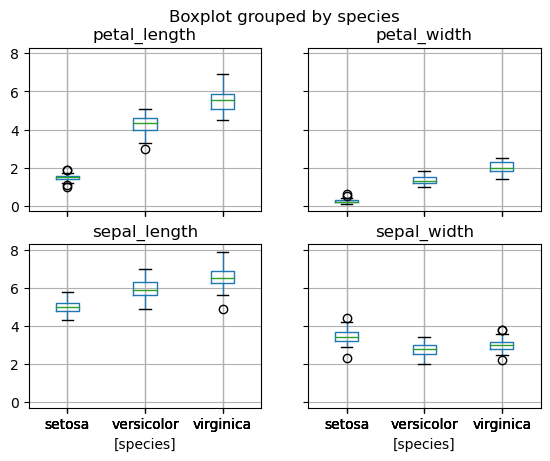

In [83]:
df_iris.boxplot(by = "species", layout = (2,2))

**9) Generating a boxplot over each variable with seaborn:**

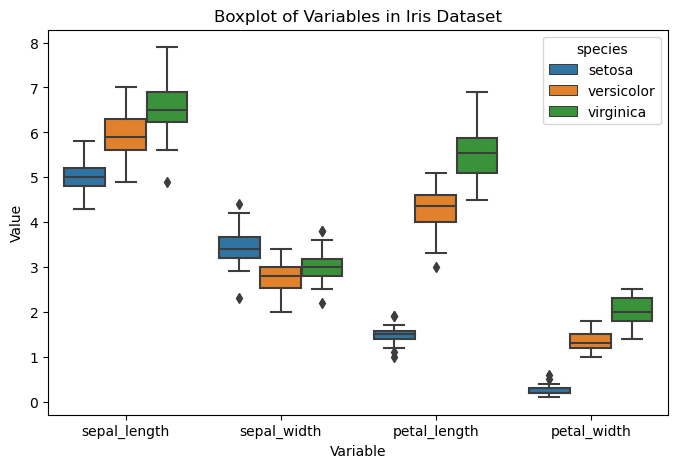

In [84]:
df_iris_melt = df_iris.melt(id_vars='species', var_name='variable', value_name='value')

fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(data=df_iris_melt, x='variable', y='value', hue='species', ax=ax)

ax.set_title('Boxplot of Variables in Iris Dataset')
ax.set_xlabel('Variable')
ax.set_ylabel('Value')

plt.show()

**10) Generating a violin plot over all variables, while indicating species:**

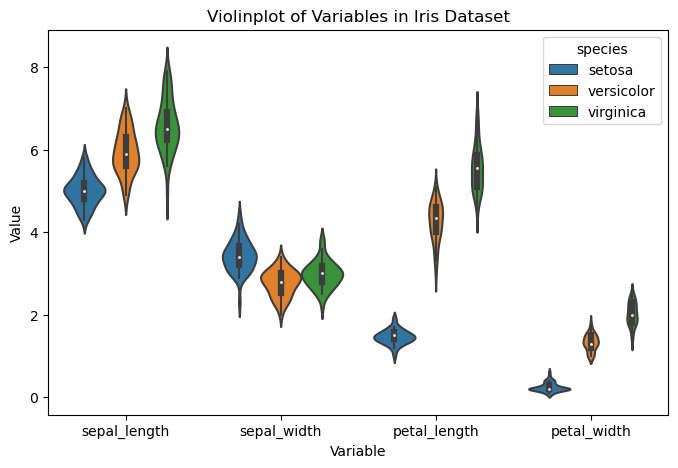

In [85]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(data=df_iris_melt, x='variable', y='value', hue='species', ax=ax)

ax.set_title('Violinplot of Variables in Iris Dataset')
ax.set_xlabel('Variable')
ax.set_ylabel('Value')

plt.show()

**11) Generating a scatterplot matrix, using species for color:**

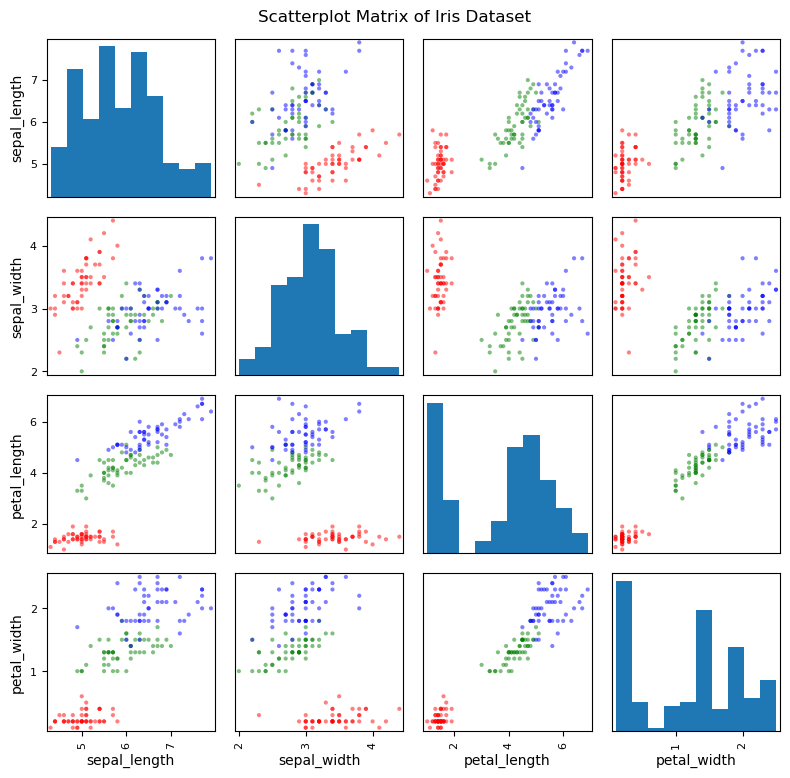

In [86]:
color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

pd.plotting.scatter_matrix(df_iris.iloc[:, :-1], c=df_iris['species'].apply(lambda x: color_dict[x]), figsize=(8, 8), diagonal='hist')

plt.suptitle('Scatterplot Matrix of Iris Dataset')
plt.tight_layout()

plt.show()

**12) Generating a pairplot of the data:**

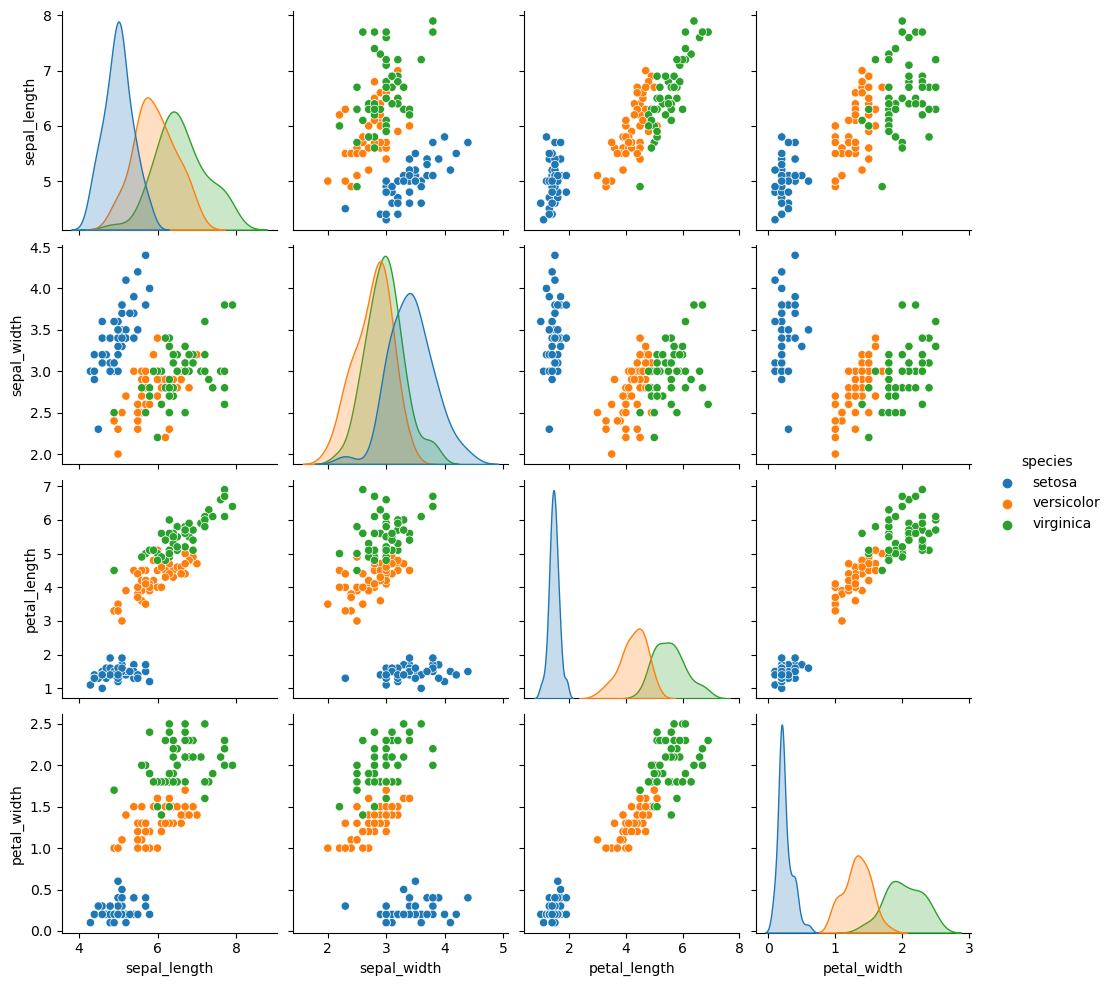

In [87]:
sns.pairplot(df_iris, hue='species')

plt.show()

**13) Observations:**

We expect that the setosa species will have the best classifier performance. As shown in the pairplot above, we can see that in each subplot, the setosa species has the most clustered, and uniform data. In addition, the setosa species does not overlap with the other species' measurements much at all, leading us to believe that the setosa would be the easiest to classify and predict.

**14) Splitting our dataframe into X and y:**

In [88]:
X = df_iris.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
y = df_iris['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

**15) Creating an instance of a decision tree classifier for the data:**

In [90]:
clf = DecisionTreeClassifier()
clf.fit(X, y)
clf

DecisionTreeClassifier()

**16) Plotting the decision tree:**

[Text(0.5, 0.9166666666666666, 'petal_width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = setosa'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = setosa'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal_width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = setosa'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = setosa'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = setosa'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = setosa'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue 

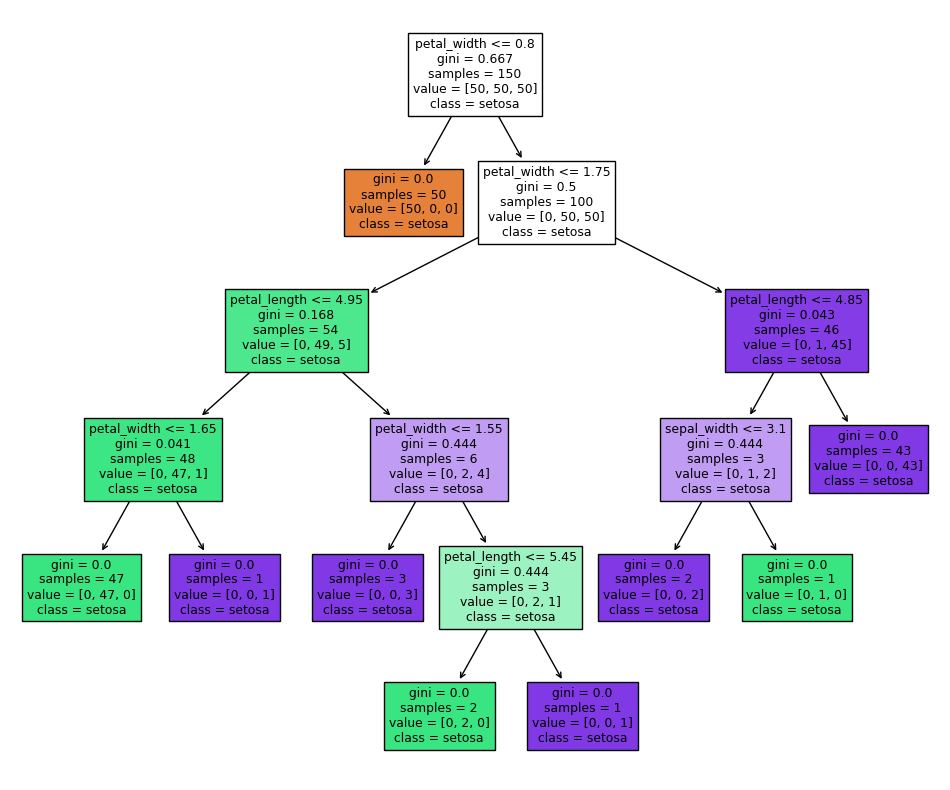

In [91]:
plt.figure(figsize=(12, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y)

**17) Using the decision tree to predict training data:**

In [92]:
y_pred = clf.predict(X)
pred_acc = clf.score(X, y)
print("Prediction accuracy is: ", pred_acc)

Prediction accuracy is:  1.0


**18) Why we are getting a perfect score:**

The model is getting 100% accuracy because it is being tested on the same data that it was trained on.

**19) Creating a new tree with adjusted pruning and complexity parameters:**

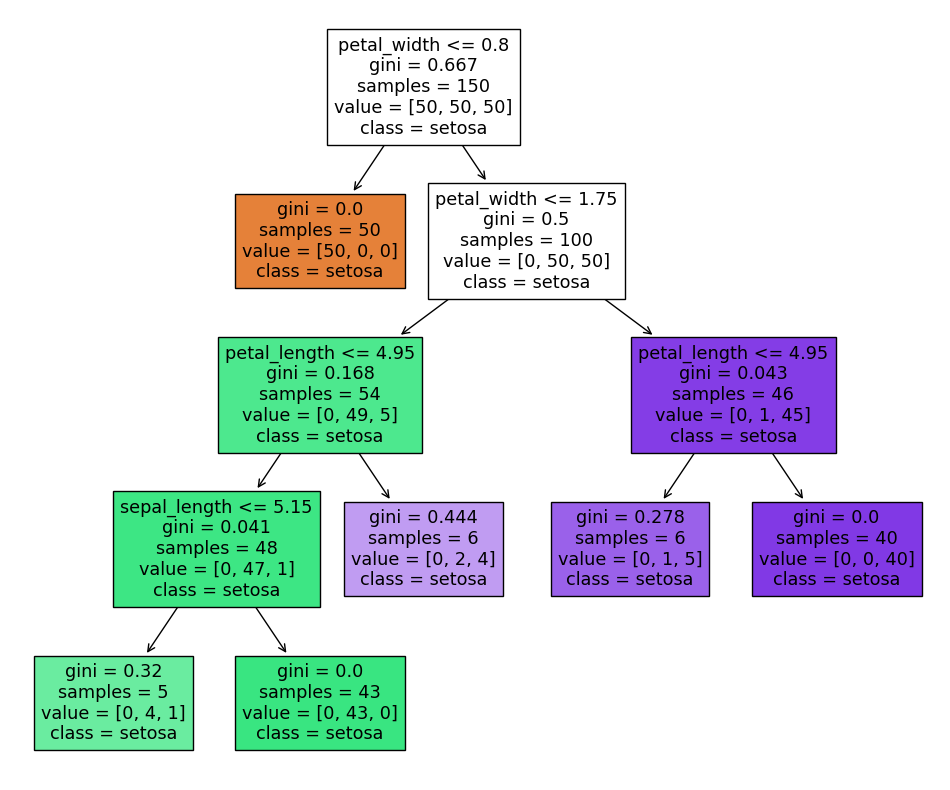

Prediction accuracy is:  0.9733333333333334


In [93]:
clf2 = DecisionTreeClassifier(min_samples_leaf=5)
clf2.fit(X,y)

plt.figure(figsize=(12,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=y)
plt.show()

y_pred = clf2.predict(X)
pred_acc = clf2.score(X, y)
print("Prediction accuracy is: ", pred_acc)

**20) Creating a classification report for the tree:**

In [94]:
# Referenced ChatGPT
report = classification_report(y, y_pred, target_names=y.unique(), output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report Output:\n")
report_df

Classification Report Output:



,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,50.000000
versicolor,0.979167,0.940000,0.959184,50.000000
virginica,0.942308,0.980000,0.960784,50.000000
accuracy,0.973333,0.973333,0.973333,0.973333
macro avg,0.973825,0.973333,0.973323,150.000000
weighted avg,0.973825,0.973333,0.973323,150.000000


Using the data provided from the classification_report function, we see that the "virginica" class had the lowest precision and the "versicolor" class had the lowest recall.

**21) Creating a confusion matrix for the data:**

In [95]:
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

**22) Using the plot_confusion_matrix to summarize classifier performance:**

Text(0, 0.5, 'True Label')

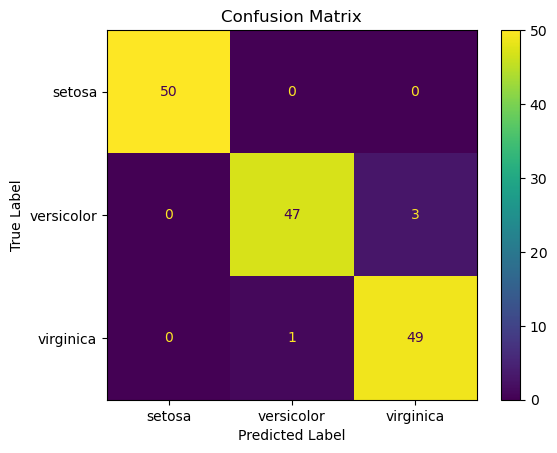

In [96]:
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=y.unique())
conf_mat_disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

**23) Interpreting the confusion matrix and classification report:**

Using the confusion matrix and classification report, the "setosa" class seems to perform the best while the "versicolor" class seems to perform the worst. There were a total of 4 incorrect predictions according to the confusion matrix.

**24) Using the train_test_split function to split the data into a 70% / 30% split of training and test data, respectively:**

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of X_train: (105, 4)
Dimensions of X_test: (45, 4)
Dimensions of y_train: (105,)
Dimensions of y_test: (45,)


**25) Creating a new instance of DecisionTreeClassifier, and training it:**

In [98]:
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=100)

**26) Using the model to predict the labels on the training and test data:**

In [99]:
y_pred_train = clf.predict(X_train)
print("Accuracy on training data:", clf.score(X_train, y_train))

y_pred_test = clf.predict(X_test)
print("Accuracy on test data:", clf.score(X_test, y_test))

Accuracy on training data: 0.9619047619047619
Accuracy on test data: 0.9111111111111111


**27) Using the classification report and confusion matrix to assess performance of the classifier:**

In [100]:
train_report = classification_report(y_train, y_pred_train, target_names=y_train.unique(), output_dict=True)
train_report_df = pd.DataFrame(train_report).transpose()
print("Classification Report on Training Data:\n", train_report_df)

test_report = classification_report(y_test, y_pred_test, target_names=y_test.unique(), output_dict=True)
test_report_df = pd.DataFrame(test_report).transpose()
print("\nClassication Report on Test Data:\n", test_report_df)

Classification Report on Training Data:
               precision    recall  f1-score     support
versicolor     1.000000  1.000000  1.000000   34.000000
virginica      0.911765  0.968750  0.939394   32.000000
setosa         0.972973  0.923077  0.947368   39.000000
accuracy       0.961905  0.961905  0.961905    0.961905
macro avg      0.961579  0.963942  0.962254  105.000000
weighted avg   0.963071  0.961905  0.961981  105.000000

Classication Report on Test Data:
               precision    recall  f1-score    support
virginica      1.000000  1.000000  1.000000  16.000000
versicolor     0.850000  0.944444  0.894737  18.000000
setosa         0.888889  0.727273  0.800000  11.000000
accuracy       0.911111  0.911111  0.911111   0.911111
macro avg      0.912963  0.890572  0.898246  45.000000
weighted avg   0.912840  0.911111  0.909006  45.000000


Text(0, 0.5, 'True Label')

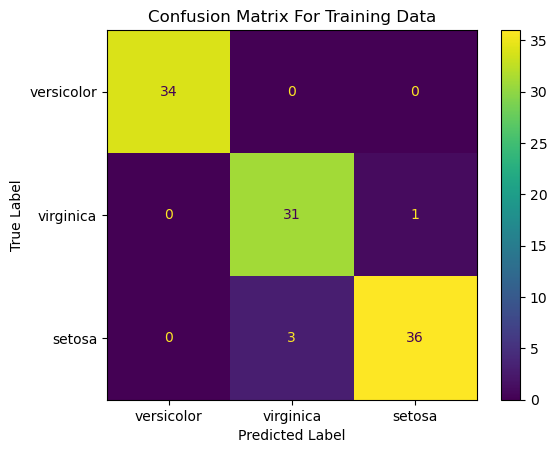

In [101]:
train_conf_mat = confusion_matrix(y_train, y_pred_train)
train_conf_mat_disp = ConfusionMatrixDisplay(train_conf_mat, display_labels=y_train.unique())
train_conf_mat_disp.plot()
plt.title('Confusion Matrix For Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Text(0, 0.5, 'True Label')

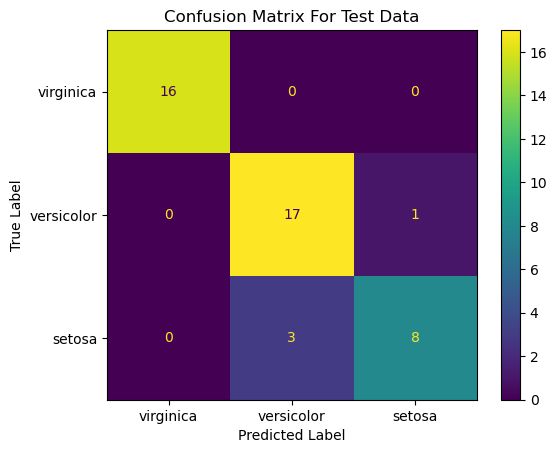

In [102]:
test_conf_mat = confusion_matrix(y_test, y_pred_test)
test_conf_mat_disp = ConfusionMatrixDisplay(test_conf_mat, display_labels=y_test.unique())
test_conf_mat_disp.plot()
plt.title('Confusion Matrix For Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

The "setosa" class appears to perform the worst in both the test and training data using the confusion matrices and classification reports. The "virginica" and "versicolor" classes both perform well in both the test and training data, with "versicolor" performing slightlty better within the training data, and "virginica" performing slightly better within the test data. There were 4 incorrect predictions in the training data and 4 incorrect predictions in the test data according to the confusion matrices for the training and test datasets.

**28) Showing misclassifications:**

In [103]:
# https://numpy.org/doc/stable/reference/generated/numpy.where.html
incorrect = np.where(y_pred_test != y_test)
print("Incorrect Predictions:\n")
count = 0
for pred in incorrect[0]:
    count += 1
    print(count, ".")
    print("\tTest Data: \n", X_test.iloc[pred])
    print("\tTest Result: ", y_test.iloc[pred],"\n")

Incorrect Predictions:

1 .
	Test Data: 
 sepal_length    5.6
sepal_width     2.8
petal_length    4.9
petal_width     2.0
Name: 121, dtype: float64
	Test Result:  virginica 

2 .
	Test Data: 
 sepal_length    6.2
sepal_width     2.8
petal_length    4.8
petal_width     1.8
Name: 126, dtype: float64
	Test Result:  virginica 

3 .
	Test Data: 
 sepal_length    6.1
sepal_width     3.0
petal_length    4.9
petal_width     1.8
Name: 127, dtype: float64
	Test Result:  virginica 

4 .
	Test Data: 
 sepal_length    6.0
sepal_width     2.7
petal_length    5.1
petal_width     1.6
Name: 83, dtype: float64
	Test Result:  versicolor 



**29) Creating a scatterplot matrix highlighting misclassified instances:**

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


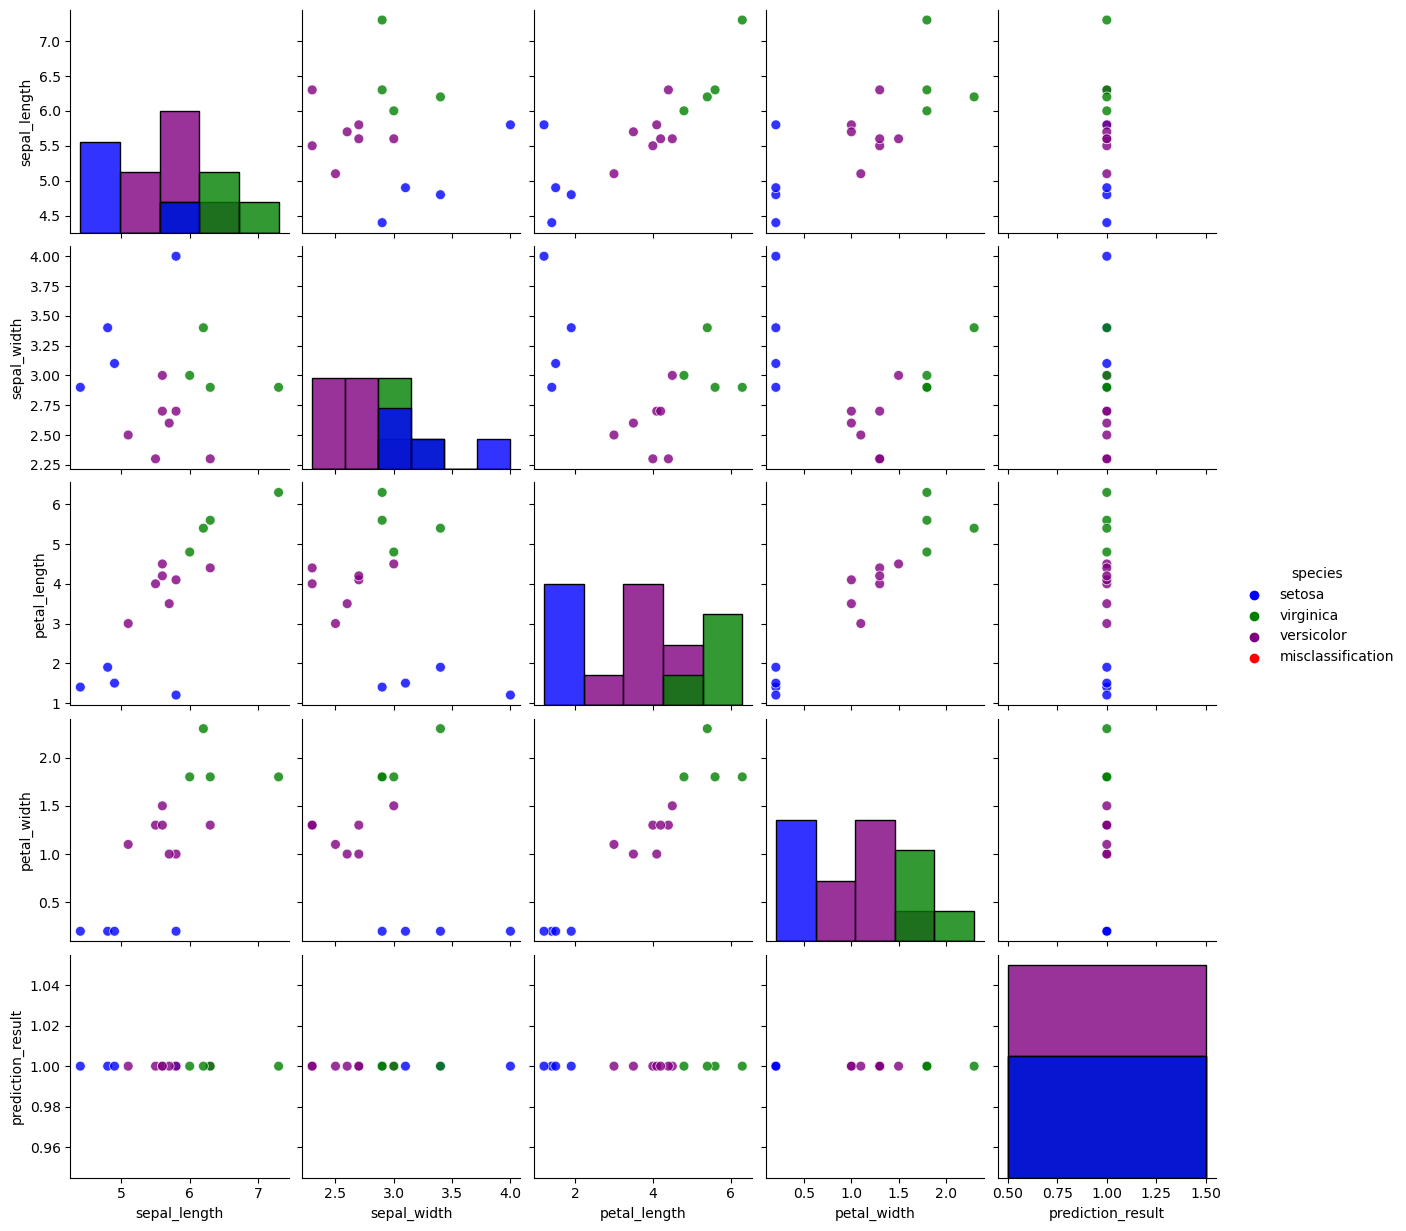

In [123]:
# Referenced ChatGPT
correct = np.where(y_pred_test == y_test)[0]
correct = list(correct)
misclassified = list(np.where(y_pred_test != y_test)[0])
test_data = X_test.copy()
prediction_result = []
cnt = 0
for idx in X_test.index:
    cnt+=1
    if idx in misclassified:
        prediction_result.append(False)
    else:
        prediction_result.append(True)
test_data['prediction_result'] = prediction_result
test_data['species'] = df_iris.loc[df_iris.index.isin(test_data.index)]['species']
test_data['species'] = test_data['species'].astype('string')

for i in test_data[test_data['prediction_result']==False].index:
    test_data.loc[i,'species'] = "misclassification"

sns.pairplot(test_data, hue='species', hue_order=['setosa','virginica','versicolor','misclassification'], diag_kind='hist', plot_kws={'alpha':0.8, 's':50}, diag_kws={'alpha':0.8}, 
             palette={'setosa':'blue', 'virginica':'green', 'versicolor':'purple', 'misclassification':'red'})

**30) Using K-fold cross validation with our data:**

A K-fold cross-validator provides the train and test indices to split data in train and test sets. It splits the dataset into k consecutive folds, and each fold is used once as a validation while the remaining k-1 folds create the training set.

In [105]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)

kfold

KFold(n_splits=10, random_state=100, shuffle=True)

**31) Using the split method to iterate through each fold:**

In [106]:
results_df = pd.DataFrame(columns=['true_label', 'dt_default'])
for i, (train_index, test_index) in enumerate(kfold.split(X)):

    X_train, X_test = X[X.index.isin(train_index)], X[X.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    y_pred_test = clf.predict(X_test)
    fold_df = pd.DataFrame({'true_label': y_test, 'dt_default': y_pred_test})
    results_df = pd.concat([results_df, fold_df], ignore_index=True)
    
results_df

,true_label,dt_default
0,setosa,setosa
1,setosa,setosa
2,setosa,setosa
3,setosa,setosa
4,setosa,setosa
...,...,...
145,versicolor,versicolor
146,virginica,virginica
147,virginica,virginica
148,virginica,virginica


**32) Showing the classification report and confusion matrix from the 10-fold cross validation:**

In [107]:
test_report = classification_report(y_test, y_pred_test, target_names=y_test.unique(), output_dict=True)
test_report_df = pd.DataFrame(test_report).transpose()
print("\nClassication Report on Test Data:\n", test_report_df)


Classication Report on Test Data:
               precision  recall  f1-score  support
setosa              1.0     1.0       1.0      4.0
versicolor          1.0     1.0       1.0      7.0
virginica           1.0     1.0       1.0      4.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     15.0
weighted avg        1.0     1.0       1.0     15.0


In [108]:
conf_mat = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[4 0 0]
 [0 7 0]
 [0 0 4]]


Text(0, 0.5, 'True Label')

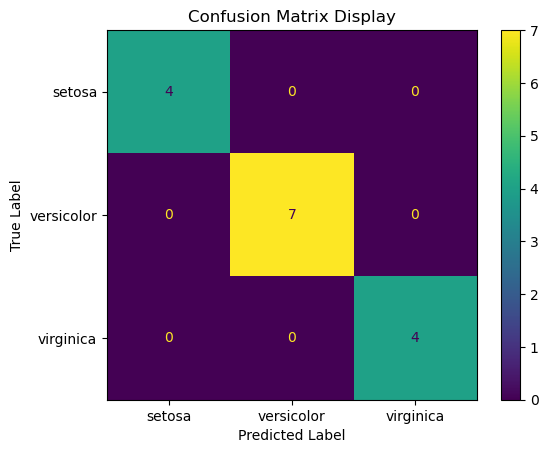

In [109]:
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=y_test.unique())
conf_mat_disp.plot()
plt.title('Confusion Matrix Display')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

**33) Generating a report of all test instances that were misclassified from the 10-fold cross validation:**

Misclassified Test Instances: 
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, prediction_result, species, prediction]
Index: []
test_data dataframe: 
      sepal_length  sepal_width  petal_length  petal_width  prediction_result  \
8             4.4          2.9           1.4          0.2               True   
14            5.8          4.0           1.2          0.2               True   
24            4.8          3.4           1.9          0.2               True   
34            4.9          3.1           1.5          0.2               True   
53            5.5          2.3           4.0          1.3               True   
66            5.6          3.0           4.5          1.5               True   
67            5.8          2.7           4.1          1.0               True   
79            5.7          2.6           3.5          1.0               True   
87            6.3          2.3           4.4          1.3               True   
94            5

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


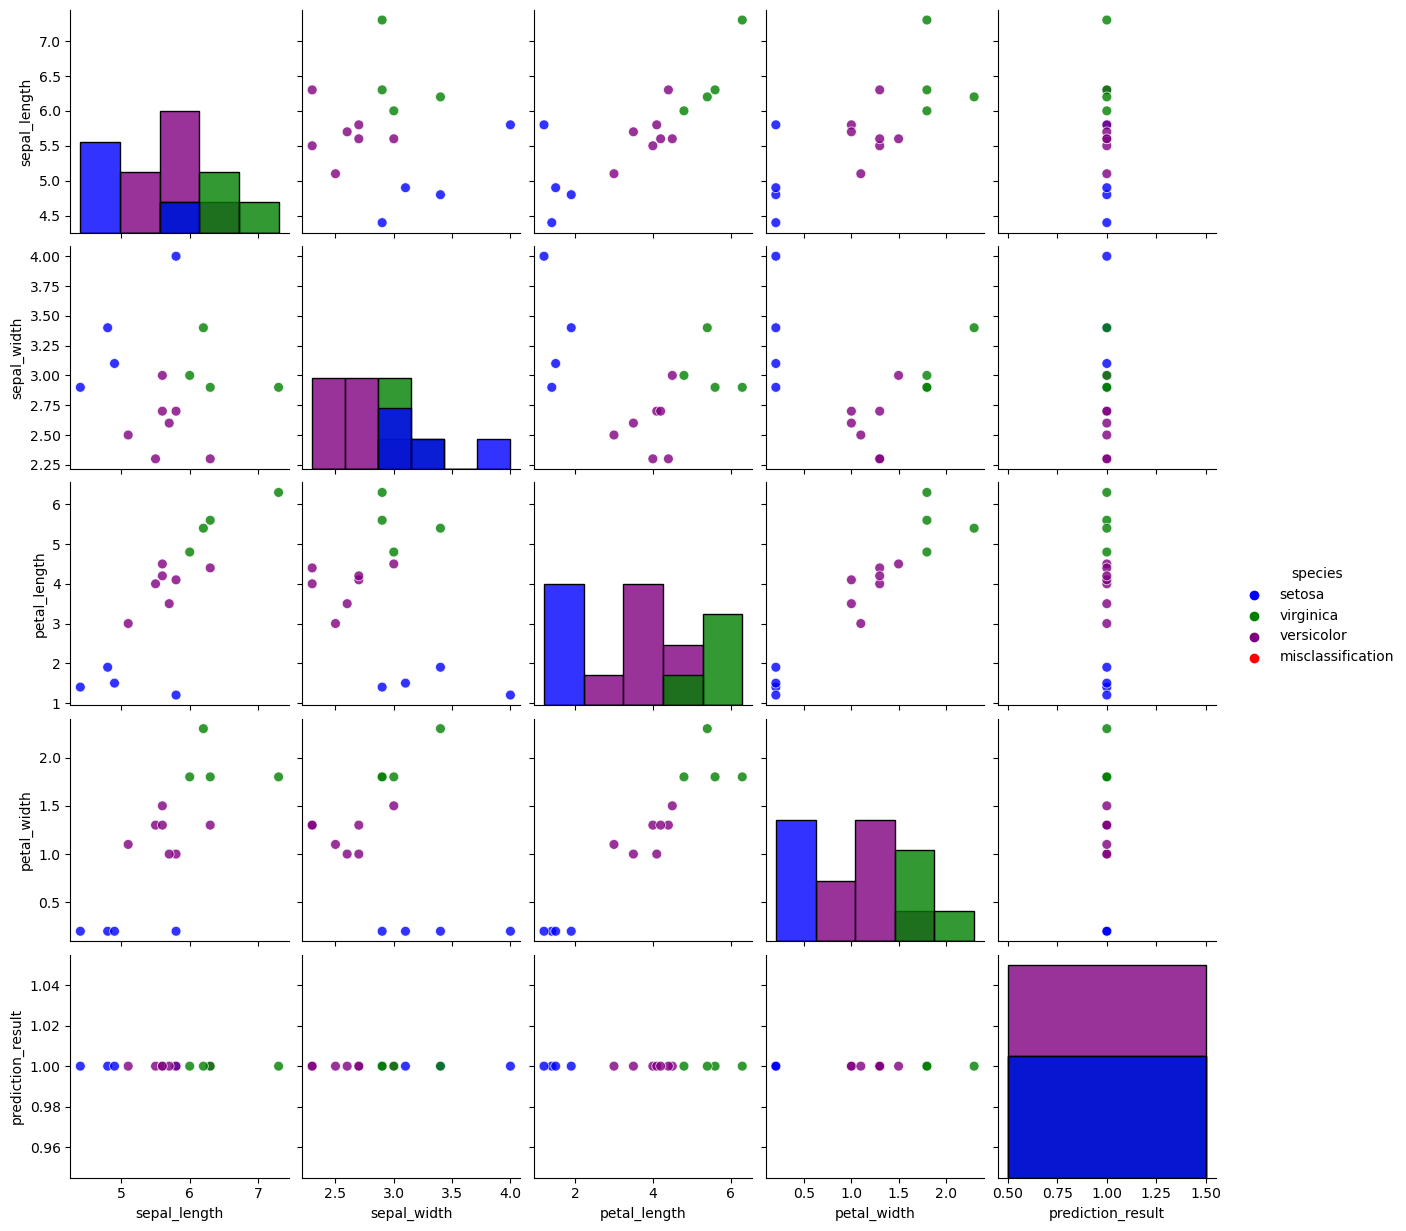

In [125]:
test_data['prediction_result'] = prediction_result
test_data['species'] = df_iris.loc[df_iris.index.isin(test_data.index)]['species']
test_data['species'] = test_data['species'].astype('string')
test_data['prediction'] = y_pred_test

correct = test_data[test_data['species']==test_data['prediction']]#['prediction_result'] = True
misclassified = test_data[test_data['species']!=test_data['prediction']]#['prediction_result'] = False
misclassified['prediction_result'] = False
misclassified['species'] = "misclassification"
print("Misclassified Test Instances: \n", misclassified)

test_data = pd.concat([correct, misclassified])
print("test_data dataframe: \n", test_data)
print(test_data['prediction_result'].value_counts())

sns.pairplot(test_data, hue='species', hue_order=['setosa','virginica','versicolor','misclassification'], diag_kind='hist', plot_kws={'alpha':0.8, 's':50}, diag_kws={'alpha':0.8}, 
             palette={'setosa':'blue', 'virginica':'green', 'versicolor':'purple', 'misclassification':'red'})

**34) Using the cross_validate method to run a 10-fold cross validation on a default decision tree:**

In [ ]:
# Assisted by ChatGPT
clf = SVC(kernel='linear', C=1, random_state=42)

scoring = {'accuracy': make_scorer(accuracy_score),
           'f1_macro': make_scorer(f1_score, average='macro')}

cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring, return_train_score=True)

cv_df = pd.DataFrame(cv_results)

cv_df

**35) Explaining the variables fit_time and score_time:**

As shown above, the fit_time variable refers to how long the estimator took to fit the training data for each fold of the cross-validation. The variable score_time refers to how long the estimator took to predict the test data and calculate evaluation scores for each fold of the cross-validation.

**36) Using the cross_val_predict function to run a 10-fold cross validation with a default decision tree:**

In [ ]:
# Assisted by ChatGPT
clf = DecisionTreeClassifier()

y_pred = cross_val_predict(clf, X, y, cv=10)

print(classification_report(y, y_pred))

**37) Comparing the predictive performance of a default decision tree, a decision tree with entropy, a K-Neighbors classifier, and MultinominalNB classifier:**

In [ ]:
# Assisted by ChatGPT
# Default decision tree
clf_dt = DecisionTreeClassifier()
y_pred_dt = cross_val_predict(clf_dt, X, y, cv=10)
print("Default Decision Tree:")
print(classification_report(y, y_pred_dt))

# Decision tree with entropy
clf_dt_entropy = DecisionTreeClassifier(criterion='entropy')
y_pred_dt_entropy = cross_val_predict(clf_dt_entropy, X, y, cv=10)
print("Decision Tree with Entropy:")
print(classification_report(y, y_pred_dt_entropy))

# KNN with k=3
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
y_pred_knn_3 = cross_val_predict(clf_knn_3, X, y, cv=10)
print("KNN with k=3:")
print(classification_report(y, y_pred_knn_3))

# KNN with k=5
clf_knn_5 = KNeighborsClassifier(n_neighbors=5)
y_pred_knn_5 = cross_val_predict(clf_knn_5, X, y, cv=10)
print("KNN with k=5:")
print(classification_report(y, y_pred_knn_5))

# Naive Bayes
clf_nb = MultinomialNB()
y_pred_nb = cross_val_predict(clf_nb, X, y, cv=10)
print("Naive Bayes:")
print(classification_report(y, y_pred_nb))

The default decision tree and decision tree with entropy perform similarly, with slightly better precision, recall, and F1 score for the decision tree with entropy on versicolor and class virginica. The KNN classifier with k=3 outperforms the KNN classifier with k=5, with higher precision, recall, and F1 score on all classes except for setosa. The Naive Bayes classifier has the lowest performance across all metrics and classes, with the lowest precision, recall, and F1 score on all classes except for setosa.

Overall, if we were to choose one model for this dataset, we would likely choose the decision tree with entropy or the KNN classifier with k=3 since they have the highest overall performance across all metrics and classes.